# First Step of Data Preparation Process

The Expression in-the-Wild(ExpW) Dataset used in this project includes an images folder containing raw images and a file named label.lst that identifies Facial Expressions.

The label.lst file contains the position of the detected faces in each image, cofidence of detection and the expression label of the related face.

The label.lst file will be read as pandas DataFrame and the images to be displayed will be read with the cv2 library.

In this notebook file, dataset will be statistically analyzed and checked manually.

See http://mmlab.ie.cuhk.edu.hk/projects/socialrelation/index.html for dataset.

Images must be moved to /Data/RawData/Images/ path.

label.lst must be moved to /Data/RawData/Label/ path.

In [1]:
#Libraries are being imported
import numpy as np
import cv2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Library versions are being printed
print('numpy Version: ' + np.__version__)
print('cv2 Version: ' + cv2.__version__)
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlib.__version__)

numpy Version: 1.22.3
cv2 Version: 4.5.1
pandas Version: 1.4.3
matplotlib Version: 3.5.2


In [3]:
#Function to draw Image
def DrawImage(imgDf : pd.DataFrame, labelDf : pd.DataFrame) -> None:
    plt.figure(figsize=(10,10))
    
    for i in range(imgDf.shape[0]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        #matplotlib works in RGB color space by default
        #since the images are kept in BGR color space due to the use of opencv in this project
        #color conversion is required to draw a picture
        plt.imshow(cv2.cvtColor(imgDf.iloc[i].ImageBGR, cv2.COLOR_BGR2RGB))
        
        plt.xlabel(labelDf.iloc[imgDf.iloc[i].Label].Name)
        
    plt.show()
    
    return

In [4]:
#Function to Read Images BGR Format
def ReadImage(row : dict):
    img = cv2.imread('../Data/RawData/Image/' + row['ImageName'])
    if img is not None:
        return cv2.resize(img[row['FaceBoxTop'] : row['FaceBoxBottom'], row['FaceBoxLeft'] : row['FaceBoxRight']], (224, 224))
    return None

In [5]:
#Function to Draw Chart
def DrawChart(forChart : pd.DataFrame, labelDf : pd.DataFrame):
    plt.stem(labelDf.Name, forChart.values)
    del forChart
    plt.title('Number Of Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Number Of Image')
    plt.show()

In [6]:
#The data headers in the label.lst file are being defined according to the readme.txt file
dataLabel = ['ImageName', 'FaceID', 'FaceBoxTop', 'FaceBoxLeft', 'FaceBoxRight', 'FaceBoxBottom',
             'FaceBoxConfidence', 'Label']
dataLabel

['ImageName',
 'FaceID',
 'FaceBoxTop',
 'FaceBoxLeft',
 'FaceBoxRight',
 'FaceBoxBottom',
 'FaceBoxConfidence',
 'Label']

In [7]:
#The labels in the label.lst file are being defined in order according to the readme.txt file
labelDf = pd.DataFrame(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], columns = ['Name'])
labelDf

,Name
0,Angry
1,Disgust
2,Fear
3,Happy
4,Sad
5,Surprise
6,Neutral


In [8]:
#Label DataFrame is being saved in json format to exemplify the use of json format for future use
labelDf.to_json('../Data/RawData/Label/Label.json')

In [9]:
#label.lst file is being read as DataFrame
imageListDf = pd.read_csv('../Data/RawData/Label/label.lst', sep = ' ', header = None, names = dataLabel)
imageListDf

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
...,...,...,...,...,...,...,...,...
91788,surprised_expression_546.jpg,0,70,70,351,351,37.7117,5
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5
91791,ecstatic_asian_31.jpg,0,60,136,184,108,39.9223,3


In [10]:
#imageListDf is being examined with describe Method

#For most fields in the imageListDf, the results of the describe method don't make any sense
#The focus will be on the FaceBoxConfidence field, the only field where results of describe method makes sense
#Looking at this field, it can be interpreted that high values mean more reliable data and low values mean less reliable data

#However, by looking at the maximum value of the FaceBoxConfidence field,
#it can be seen that the values of the field can be over 100

#Personally, when I first saw the name of the field, I had an expectation that this field should be in the range 0-100
#For this reason, I want to do a manual check soon to confirm the inference

imageListDf.describe()

,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label
count,91793.000000,91793.000000,91793.000000,91793.000000,91793.000000,91793.000000,91793.000000
mean,0.966751,149.780365,321.105128,458.110194,286.785430,50.177224,4.190036
std,1.654993,194.647812,314.567562,345.457619,232.724853,25.171536,1.724111
min,0.000000,0.000000,0.000000,46.000000,46.000000,0.010154,0.000000
25%,0.000000,39.000000,115.000000,234.000000,141.000000,30.545100,3.000000
50%,0.000000,82.000000,230.000000,363.000000,215.000000,49.789400,4.000000
75%,1.000000,180.000000,412.000000,558.000000,345.000000,68.912000,6.000000
max,9.000000,2518.000000,2917.000000,2999.000000,2636.000000,142.413000,6.000000


In [11]:
#The data is being grouped by imageName and the number of faces in images is being checked
#By looking at the resulting DataFrame, it can be seen that an image can contain more than one face
pd.DataFrame(imageListDf.groupby(['ImageName']).size(), columns = ['Size']).sort_values(by = ['Size'])

,Size
ImageName,
Roller_Coaster_lady_862.jpg,1
distaste_people_719.jpg,1
distaste_people_753.jpg,1
distaste_people_792.jpg,1
distaste_people_867.jpg,1
...,...
amazed_president_890.jpg,46
astound_expression_400.jpg,48
awe_grandfather_256.jpg,50


In [12]:
#The 25 faces with lowest FaceBoxConfidence are being copied to headDf
headDf = imageListDf.sort_values(by = ['FaceBoxConfidence']).head(25).copy()
headDf

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label
82285,amazed_African_633.jpg,0,15,254,349,110,0.010154,5
27965,crying_face_482.jpg,1,39,39,273,273,0.022050,4
53256,amazed_asian_270.jpg,3,111,539,586,158,0.030390,3
25184,hostile_grandmother_370.jpg,4,157,422,489,224,0.033509,6
13800,mad_actor_807.jpg,2,305,264,345,386,0.039348,6
17025,anxious_son_240.jpg,0,192,768,1536,960,0.044926,6
37453,crying_manager_736.jpg,0,31,173,361,219,0.053749,4
52340,awe_student_121.jpg,3,688,208,400,880,0.060605,6
11849,hostile_expression_394.jpg,1,16,325,392,83,0.067734,6
16940,anxious_mother_314.jpg,0,13,67,147,93,0.072945,6


In [13]:
#The face boxes in headDf are being read from raw images
headDf['ImageBGR'] = headDf.apply(lambda row: ReadImage(row), axis=1)
headDf

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label,ImageBGR
82285,amazed_African_633.jpg,0,15,254,349,110,0.010154,5,"[[[145, 143, 125], [146, 144, 126], [150, 150,..."
27965,crying_face_482.jpg,1,39,39,273,273,0.022050,4,"[[[3, 9, 16], [6, 12, 17], [8, 14, 19], [9, 15..."
53256,amazed_asian_270.jpg,3,111,539,586,158,0.030390,3,"[[[128, 145, 131], [128, 145, 131], [128, 145,..."
25184,hostile_grandmother_370.jpg,4,157,422,489,224,0.033509,6,"[[[178, 188, 205], [178, 188, 205], [162, 173,..."
13800,mad_actor_807.jpg,2,305,264,345,386,0.039348,6,"[[[169, 180, 248], [169, 180, 248], [166, 179,..."
17025,anxious_son_240.jpg,0,192,768,1536,960,0.044926,6,"[[[41, 79, 114], [43, 81, 116], [45, 83, 118],..."
37453,crying_manager_736.jpg,0,31,173,361,219,0.053749,4,"[[[110, 125, 151], [97, 112, 138], [101, 116, ..."
52340,awe_student_121.jpg,3,688,208,400,880,0.060605,6,"[[[184, 182, 182], [184, 182, 182], [184, 182,..."
11849,hostile_expression_394.jpg,1,16,325,392,83,0.067734,6,"[[[85, 100, 79], [85, 100, 79], [79, 94, 74], ..."
16940,anxious_mother_314.jpg,0,13,67,147,93,0.072945,6,"[[[151, 156, 155], [151, 156, 155], [150, 155,..."


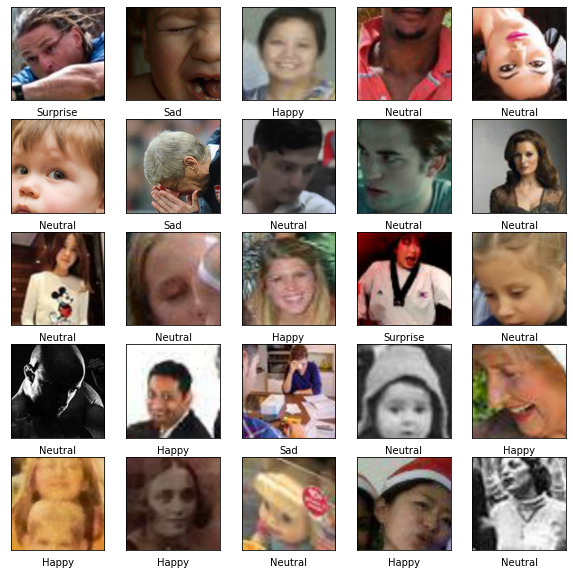

In [14]:
#Faces in headDf are being drawn with their label
DrawImage(headDf, labelDf)

In [15]:
#The 25 faces with highest FaceBoxConfidence are being copied to tailDf
tailDf = imageListDf.sort_values(by = ['FaceBoxConfidence']).tail(25).copy()
tailDf

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label
69757,awe_old_803.jpg,0,114,334,448,228,124.299,3
3204,angry_woman_199.jpg,0,133,375,696,454,124.434,0
52306,amazed_actor_290.jpg,0,28,330,443,141,124.452,3
70758,awe_programmer_372.jpg,0,67,484,619,202,124.481,3
58382,amazed_president_488.jpg,0,23,84,140,79,124.503,3
74095,excited_american_213.jpg,0,48,176,272,144,124.868,5
81763,awe_student_661.jpg,0,349,269,459,539,125.160,6
78965,awe_actor_656.jpg,0,68,91,227,204,125.183,3
69657,awe_people_71.jpg,0,125,182,250,193,125.238,3
79292,awe_asian_211.jpg,0,15,31,126,110,125.592,6


In [16]:
#The face boxes in tailDf are being read from raw images
tailDf['ImageBGR'] = tailDf.apply(lambda row: ReadImage(row), axis=1)
tailDf

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label,ImageBGR
69757,awe_old_803.jpg,0,114,334,448,228,124.299,3,"[[[252, 249, 245], [252, 249, 245], [251, 248,..."
3204,angry_woman_199.jpg,0,133,375,696,454,124.434,0,"[[[239, 242, 246], [215, 222, 229], [210, 219,..."
52306,amazed_actor_290.jpg,0,28,330,443,141,124.452,3,"[[[4, 12, 11], [3, 11, 10], [2, 10, 9], [2, 10..."
70758,awe_programmer_372.jpg,0,67,484,619,202,124.481,3,"[[[227, 225, 255], [225, 223, 255], [222, 221,..."
58382,amazed_president_488.jpg,0,23,84,140,79,124.503,3,"[[[252, 247, 248], [252, 247, 248], [252, 247,..."
74095,excited_american_213.jpg,0,48,176,272,144,124.868,5,"[[[250, 246, 251], [251, 247, 251], [253, 250,..."
81763,awe_student_661.jpg,0,349,269,459,539,125.160,6,"[[[171, 187, 199], [169, 184, 197], [166, 182,..."
78965,awe_actor_656.jpg,0,68,91,227,204,125.183,3,"[[[43, 67, 67], [43, 62, 63], [44, 56, 58], [4..."
69657,awe_people_71.jpg,0,125,182,250,193,125.238,3,"[[[21, 18, 20], [21, 18, 20], [25, 22, 24], [2..."
79292,awe_asian_211.jpg,0,15,31,126,110,125.592,6,"[[[255, 255, 255], [255, 255, 254], [255, 255,..."


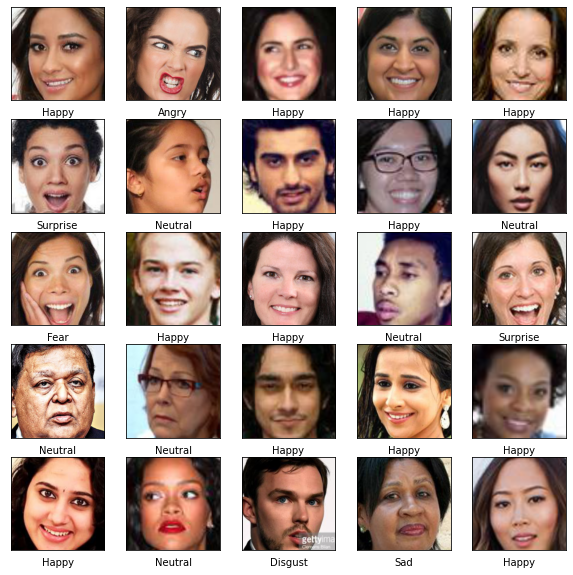

In [17]:
#Faces in tailDf are being drawn with their label
DrawImage(tailDf, labelDf)

In [18]:
#Looking at the drawn images, it can be clearly seen that data with a high FaceBoxConfidence value is more reliable
#In this way the inference is confirmed
#This information will be used in future operations on the dataset

#headDf and tailDf are being cleaned
del headDf
del tailDf

In [19]:
#The number of data for each label is being calculated by grouping the imageListDf by to the label
forChart = pd.DataFrame(imageListDf.groupby(['Label']).size(), columns = ['Size'])
forChart

,Size
Label,
0,3671
1,3995
2,1088
3,30537
4,10559
5,7060
6,34883


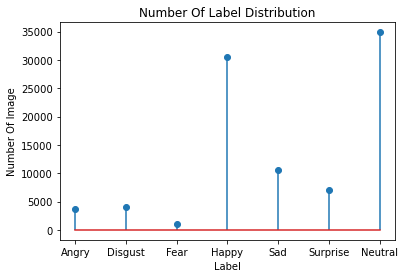

In [20]:
#For imageListDf, the distribution of labels is being plotted
#In the plotted graph it can be seen that the dataset used in this project is extremely imbalanced
DrawChart(forChart, labelDf)

In [21]:
#Data with FaceBoxConfidence value above 70 is being selected
above70Confidence = imageListDf[imageListDf['FaceBoxConfidence'] > 70.0].reset_index(drop = True)
above70Confidence

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label
0,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
1,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
2,angry_actor_137.jpg,0,93,468,842,467,88.9519,0
3,angry_actor_150.jpg,0,56,263,376,169,81.8792,0
4,angry_actor_161.jpg,0,95,127,510,478,81.7953,6
...,...,...,...,...,...,...,...,...
21729,afraid_woman_204.jpg,0,20,13,93,100,74.5950,6
21730,expressionless_husband_673.jpg,0,48,194,388,242,82.2975,4
21731,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
21732,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5


In [22]:
#The number of data for each label is being calculated by grouping the above70Confidence by to the label
forChart = pd.DataFrame(above70Confidence.groupby(['Label']).size(), columns = ['Size'])
forChart

,Size
Label,
0,1057
1,1011
2,247
3,8942
4,1895
5,2042
6,6540


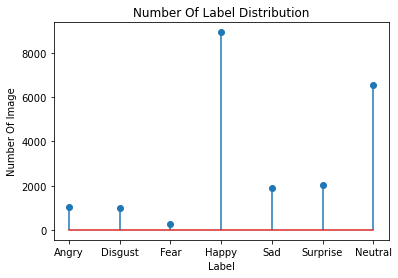

In [23]:
#For above70Confidence, the distribution of labels is being plotted
#In the plotted graph it can be seen that the dataset used in this project is extremely imbalanced
DrawChart(forChart, labelDf)

In [24]:
#above70Confidence is being cleaned
del above70Confidence

In [25]:
#Data with FaceBoxConfidence value above 80 is being selected
above80Confidence = imageListDf[imageListDf['FaceBoxConfidence'] > 80.0].reset_index(drop = True)
above80Confidence

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label
0,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
1,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
2,angry_actor_137.jpg,0,93,468,842,467,88.9519,0
3,angry_actor_150.jpg,0,56,263,376,169,81.8792,0
4,angry_actor_161.jpg,0,95,127,510,478,81.7953,6
...,...,...,...,...,...,...,...,...
12122,surprised_expression_37.jpg,0,64,129,322,257,94.8262,5
12123,surprised_expression_289.jpg,0,47,181,261,127,96.2934,3
12124,expressionless_husband_673.jpg,0,48,194,388,242,82.2975,4
12125,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5


In [26]:
#The number of data for each label is being calculated by grouping the above80Confidence by to the label
forChart = pd.DataFrame(above80Confidence.groupby(['Label']).size(), columns = ['Size'])
forChart

,Size
Label,
0,562
1,536
2,138
3,5211
4,992
5,1187
6,3501


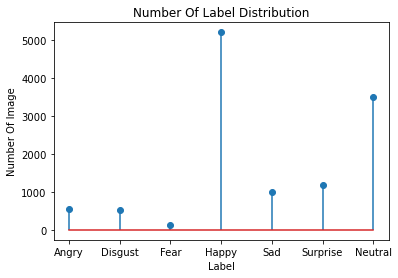

In [27]:
#For above80Confidence, the distribution of labels is being plotted
#In the plotted graph it can be seen that the dataset used in this project is extremely imbalanced
DrawChart(forChart, labelDf)

In [28]:
#above80Confidence is being cleaned
del above80Confidence